In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size
rng = np.random.default_rng() # random generator

## 4.1

In [2]:
S = 50 # initial stock price
r = 0.05 # risk-free rate
q = 0.02 # dividend yield
T = 1 # maturity
sigma1 = 0.2 # volatility 1
sigma2 = 0.5 # volatility 2
N = 500 # number of simulations

In [3]:
z = rng.standard_normal(size=N)
x = (rng.random(size=N) < 0.5).astype(int) # 0 or 1
sigma = sigma1 * x + sigma2 * (1 - x) # volatility
log_ST = np.log(S) + (r - q - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z

print("Mean of log(S_T): ", np.mean(log_ST))
print("Standard Deviation of log(S_T): ", np.std(log_ST))
print("Fraction that lie more than two std below the mean:", np.mean(log_ST < np.mean(log_ST) - 2 * np.std(log_ST)))

Mean of log(S_T):  3.8641608525979043
Standard Deviation of log(S_T):  0.39531539093157164
Fraction that lie more than two std below the mean: 0.034


# 4.2

In [9]:
def simulating_GARCH(S0, sigma0, r, q, dt, N, _theta, _kappa, _lambda, num_sim):
    results = np.zeros(num_sim)
    for k in range(num_sim):
        sigma = sigma0
        S = S0
        while N > 0:
            y = rng.standard_normal() * sigma
            S = S * np.exp((r - q - 0.5 * sigma ** 2) * dt + y * np.sqrt(dt))
            sigma = np.sqrt(_kappa * _theta + (1 - _kappa) * (1 - _lambda) * y ** 2 + (1 - _kappa) * _lambda * sigma ** 2)
            N -= 1
        results[k] = np.log(S)
    return np.mean(results), np.std(results), np.mean(results < np.mean(results) - 2 * np.std(results))

In [47]:
mean, std, frac = simulating_GARCH(S0=100, sigma0=0.3, 
                                  r=0.01, q=0.02, dt=0.01, N=100, 
                                  _theta=0.5, _kappa=0.2, _lambda=0.2, num_sim=500)
print("Mean of log(S_T): ", mean)
print("Standard Deviation of log(S_T): ", std)
print("Fraction that lie more than two std below the mean:", frac)

Mean of log(S_T):  4.605341185313434
Standard Deviation of log(S_T):  0.0038198355808115726
Fraction that lie more than two std below the mean: 0.0


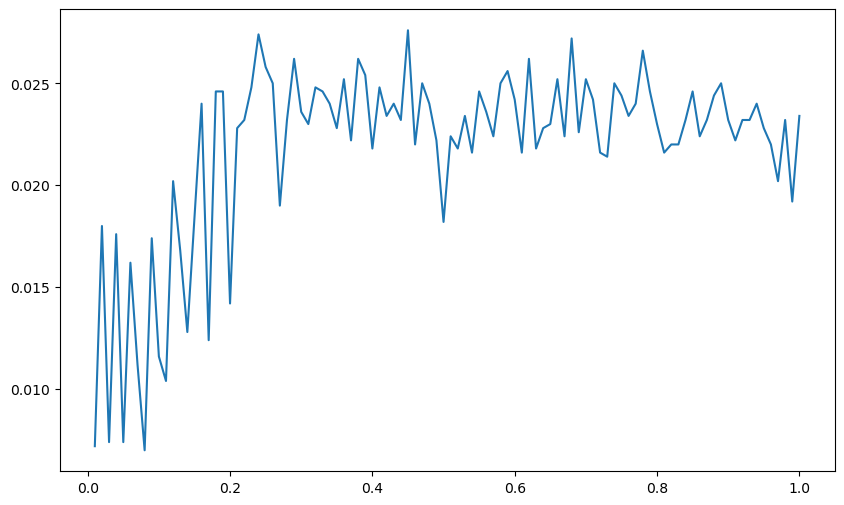

In [8]:
_kappa_set = np.linspace(0.01, 1, 100)
_kappa_frac = [simulating_GARCH(S0=100, sigma0=0.3,
                              r=0.01, q=0.02, dt=0.01, N=100, 
                              _theta=0.09, _kappa=k, _lambda=0.2, num_sim=5000)[2] for k in _kappa_set]
plt.plot(_kappa_set, _kappa_frac)
plt.show()

## 4.3

In [19]:
def stochastic_volatility(S0, sigma0, r, q, dt, N, _theta, _kappa, _gamma, _rho):
    z = rng.standard_normal(size=(N, 2))
    dB_s = z[:, 0] * np.sqrt(dt)
    dB_v = np.sqrt(dt) * (_rho * z[:, 0] + np.sqrt(1 - _rho ** 2) * z[:, 1])

    v = np.zeros(N + 1)
    v[0] = sigma0 ** 2
    S = np.zeros(N + 1)
    S[0] = S0
    for i in range(N):
        v[i + 1] = v[i] + _kappa * (_theta - v[i]) * dt + _gamma * np.sqrt(v[i]) * dB_v[i]
        S[i + 1] = S[i] * np.exp((r - q - 0.5 * v[i]) * dt + np.sqrt(v[i]) * dB_s[i])
    return np.log(S[N])

In [20]:
results = np.zeros(500)
for i in range(500):
    results[i] = stochastic_volatility(S0=100, sigma0=0.3, 
                                       r=0.01, q=0.02, dt=1/100, N=100, 
                                       _theta=0.09, _kappa=0.01, _gamma=0.01, _rho=1)
print("Mean of log(S_T): ", np.mean(results))
print("Standard Deviation of log(S_T): ", np.std(results))
print("Fraction that lie more than two std below the mean:", np.mean(results < np.mean(results) - 2 * np.std(results)))

Mean of log(S_T):  4.535432415153032
Standard Deviation of log(S_T):  0.28959586920857106
Fraction that lie more than two std below the mean: 0.026
